In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
small_width = 124.5
large_width = 135.8

r = small_width / 2.
R = large_width / 2.

# parameters: 
# y = ax + b for the top-right edge
# x = (y-b)/a
b = 2.*r
a = -2*r/R

In [31]:
step_size = 2.5

step_size_x = step_size*2 # x2 since beam is 2x wider in x than in y
step_size_y = step_size

offset_x = step_size_x/2.
offset_y = step_size_y/2.

In [32]:
start_y = r - offset_y
start_x = - (start_y - b) / a + offset_x

points_x = []
points_y = []
pos_y = start_y
pos_x = start_x 


while(pos_y > - (r + offset_y)):
    
    ## Add point
    if pos_y > 0:
        if pos_y < (a*(pos_x - 0*offset_x) + b):
            points_x.append(pos_x)
            points_y.append(pos_y)
    else:
        if pos_y > -(a*(pos_x - 0*offset_x) + b):
            points_x.append(pos_x)
            points_y.append(pos_y)

    
    ## Move
    if pos_y > 0:
        if pos_y > (a*(pos_x - 0*offset_x) + b):
            pos_y -= step_size_y
            pos_x = -(pos_y - b)/ a + offset_x
        else:
            pos_x += step_size_x
    else:
        if pos_y < -(a*(pos_x - 0*offset_x) + b):
            pos_y -= step_size_y
            pos_x = (pos_y + b)/ a  + offset_x
        else:
            pos_x += step_size_x
        
    #if len(points_x) > 1000: break

points_x = np.array(points_x)
points_y = np.array(points_y)# + step_size

print("Number of points: %i" % len(points_x))

Number of points: 1016


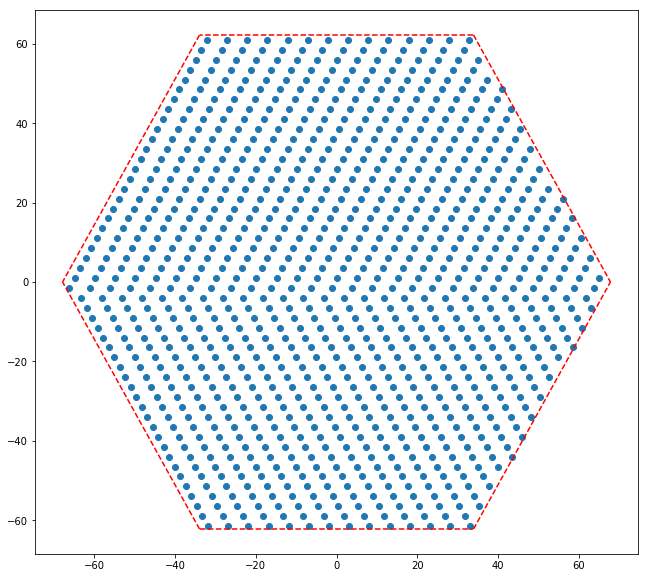

In [33]:
plt.figure(figsize = (135/125.*10,10))

plt.scatter(points_x,points_y)#, s = .1)

# top left
y1 = r; x1 = -(y1-b)/a
y2 = 0; x2 = -(y2-b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# top 
y1 = r; x1 = (y1-b)/a
y2 = r; x2 = -(y2-b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# top right
y1 = r; x1 = (y1-b)/a
y2 = 0; x2 = (y2-b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# bottom left
y1 = -r; x1 = -(y1+b)/a
y2 = 0; x2 = -(y2+b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# bottom 
y1 = -r; x1 = (y1+b)/a
y2 = -r; x2 = -(y2+b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# bottom right
y1 = -r; x1 = (y1+b)/a
y2 = 0; x2 = (y2+b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

### Save positions to file

In [5]:
with open("hexa_positions.txt","w") as f:

    for i, (x,y) in enumerate(zip(points_x,points_y)):        
        f.write("%i\t%.2f\t%.2f\n" %(i,x,y) )
        if i < 10:
            print i, x,y

0 -32.1317269076 61.0
1 -27.1317269076 61.0
2 -22.1317269076 61.0
3 -17.1317269076 61.0
4 -12.1317269076 61.0
5 -7.13172690763 61.0
6 -2.13172690763 61.0
7 2.86827309237 61.0
8 7.86827309237 61.0
9 12.8682730924 61.0


### Draw on top of image

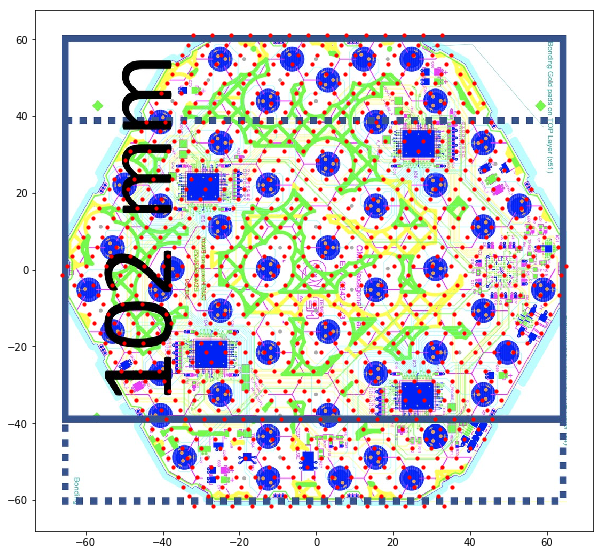

In [37]:
img = plt.imread("hexa_png.png")
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img, extent=[min(points_x),max(points_x),min(points_y),max(points_y)])
ax.scatter(points_x,points_y, s = 10, c = 'r')

### Draw random subsample

In [19]:
A = np.stack((points_x,points_y)).T

In [20]:
n_samples = 100
A = A[np.random.choice(A.shape[0], n_samples)]

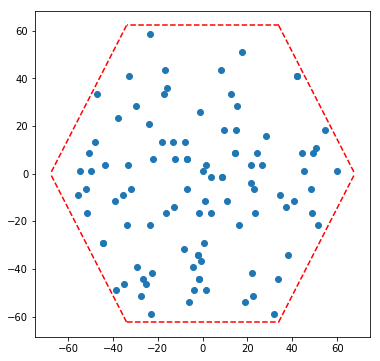

In [21]:
plt.figure(figsize = (6,6))

plt.scatter(A[:,0],A[:,1])
#plt.scatter(points[0,:20],points[1,:20])

# top left
y1 = r; x1 = -(y1-b)/a
y2 = 0; x2 = -(y2-b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# top 
y1 = r; x1 = (y1-b)/a
y2 = r; x2 = -(y2-b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# top right
y1 = r; x1 = (y1-b)/a
y2 = 0; x2 = (y2-b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# bottom left
y1 = -r; x1 = -(y1+b)/a
y2 = 0; x2 = -(y2+b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# bottom 
y1 = -r; x1 = (y1+b)/a
y2 = -r; x2 = -(y2+b)/a
plt.plot([x1,x2],[y1,y2], 'r--')

# bottom right
y1 = -r; x1 = (y1+b)/a
y2 = 0; x2 = (y2+b)/a
plt.plot([x1,x2],[y1,y2], 'r--')